In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

In [3]:
airline = pd.read_csv('airline-data-extract.csv')
airline.head()

,YEAR,MONTH,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,Unnamed: 10
0,2012,4,AA,12478,12892,-4.0,0.0,-21.0,0.0,0.0,NaN
1,2012,4,AA,12478,12892,-7.0,0.0,-65.0,0.0,0.0,NaN
2,2012,4,AA,12478,12892,-6.0,0.0,-63.0,0.0,0.0,NaN
3,2012,4,AA,12478,12892,-6.0,0.0,5.0,5.0,0.0,NaN
4,2012,4,AA,12478,12892,-2.0,0.0,-39.0,0.0,0.0,NaN


In [4]:
reviews = pd.read_json('reviews_Musical_Instruments_5.json')

In [6]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [7]:
cookie = pd.read_csv('cookie_data.txt')

In [8]:
cookie.head()

,"{""Jane"": ""2""}"
0,"{""Jane"": ""1""}"
1,"{""Pete"": ""20""}"
2,"{""Tyler"": ""3""}"
3,"{""Duncan"": ""4""}"
4,"{""Yuki"": ""5""}"


### Part 0: getting started
​
This assignment is designed to familiarize yourself with the dask framework. Please note that the datasets we use here are small enough that you would not use a distributed framework like dask. These small datasets will evaluate near instantly so that you can get familiar with the API without waiting for computations.
​
To get started, you will need to install dask. You will likely want to use `conda install dask`, which will install dask and all of it's dependencies. 
​
The first step is to instantiate your dask client. 
```python 
from dask.distributed import Client
​
client = Client(n_workers=4)
```
​
### Part 1: Working with Dask Bags
Import the dask.bag module so that you can use it. The convention is: 
```python
import dask.bag as db
```
1. Use the `from_sequence` method on dask.bag to make a dask bag containing the numbers 1-10. Try calling `.sum()` on your bag. What happens?
​
2. Save your sum as a variable and call `.visualize()` on that object to see the task graph. Now call `.compute()` on that object to force the execution.
​
3. Now let's work with a *slightly* bigger dataset. Use the `read_text` method on dask.bag to read in the `data/cookie_data.txt` dataset. Use the `.take` method to look at a few entries. 
​
4. This dataset is formatted as json, so you will have to use `.map` and `json.loads` to properly format your data.  You may need to use the `map` function again if your cookie counts are strings instead of ints!
Since there is only one entry in each dictionary, use the following code:
    ```python 
    b = b.map(lambda x: tuple(x.items())[0]).compute()
    ```
    to turn each entry into a tuple for easier manipulation.
​
5. Use `groupby`, `.filter`, `.max`, and the other aggregate functions to answer the following questions:
​
    
    i. How many unique people are represented in this bag?
    
    ii. Who has the most entries in the bag?
    
    iii. Return only the rows that describe 'Jane' 
    
    iv. Return only the rows where someone has more than 4 cookies
    
### Part 2: Working with Dask Dataframes
​
1. Read in the airline data using:
    ```python
    import dask.dataframe as dd
​
    dd.read_csv('data/airline-data-extract.csv', blocksize=1400)
    ```
    The `blocksize` argument tells dask how much data can go into one partition. Since this is a smaller dataset, it would be in a single partition without this adjustment. 
​
    You can use `head`, `tail`, and `info` to familiarize yourself with the content of this dataframe, just like you can with pandas. 
​
2. Perform a simple operation on the dataframe, such as taking the `max` of a column. What is returned?
You can call `.visualize()` on the end of this operation to see the task graph. Like with dask bags, you need to call `.compute()` to force the evaluation. 
​
3. Perform a groupby on the dataframe to determine average and maximum departure delay by the origin airport. Make sure to visualize the two task graphs. What is different about them? Make sure you understand the differences in how these operations are performed under the hood. 
​
Make sure to shut down your dask client when you are done with `client.shutdown()`


In [10]:
from dask.distributed import Client
client = Client(n_workers=4)

/Users/abdullahalatter/opt/anaconda3/envs/prc/lib/python3.8/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [49]:
import json
import dask.bag as db

In [50]:
d = db.from_sequence([1,2,3,4,5,6,7,8,9,10],2,1).sum()

In [86]:
b = db.read_text('cookie_data.txt') #.(json.loads)
b.take(3)


('{"Jane": "2"}\n', '{"Jane": "1"}\n', '{"Pete": "20"}\n')

In [89]:
cookie = b.map(lambda x: tuple(json.loads(x).items())[0])#.compute()
cookie

dask.bag<lambda, npartitions=1>

In [106]:
cookie.take(5)

(('Jane', '2'), ('Jane', '1'), ('Pete', '20'), ('Tyler', '3'), ('Duncan', '4'))

In [140]:
cookie.groupby(lambda x: x[0]).compute()

[('Jane', [('Jane', '2'), ('Jane', '1')]),
 ('Pete', [('Pete', '20')]),
 ('Tyler', [('Tyler', '3')]),
 ('Duncan',
  [('Duncan', '4'), ('Duncan', '6'), ('Duncan', '4'), ('Duncan', '5')]),
 ('Yuki', [('Yuki', '5')])]

In [161]:
cookie.map(lambda x: (x[0],int(x[1])) ).groupby(lambda x: x[0]).compute()

[('Jane', [('Jane', 2), ('Jane', 1)]),
 ('Pete', [('Pete', 20)]),
 ('Tyler', [('Tyler', 3)]),
 ('Duncan', [('Duncan', 4), ('Duncan', 6), ('Duncan', 4), ('Duncan', 5)]),
 ('Yuki', [('Yuki', 5)])]

In [173]:
cookie.map(lambda x: (x[0],int(x[1])) ).groupby(lambda x: x[0]).compute()
    #.frequencies(sort=True).topk(10,key=1).compute()

[('Jane', [('Jane', 2), ('Jane', 1)]),
 ('Pete', [('Pete', 20)]),
 ('Tyler', [('Tyler', 3)]),
 ('Duncan', [('Duncan', 4), ('Duncan', 6), ('Duncan', 4), ('Duncan', 5)]),
 ('Yuki', [('Yuki', 5)])]

In [174]:
cookie.groupby(lambda x: x[0]).\
map(lambda x: (x[0], len(x[1]))).\
groupby(lambda x: x[1]).max().compute()

(4, [('Duncan', 4)])

In [177]:
cookie.filter(lambda x: x[0] == 'Jane').compute()

[('Jane', '2'), ('Jane', '1')]

In [178]:
cookie.map(lambda item: (item[0], int(item[1]))).filter(lambda x: x[1] > 4).compute()

[('Pete', 20), ('Yuki', 5), ('Duncan', 6), ('Duncan', 5)]

In [179]:
import dask.dataframe as dd

In [190]:
ddf = dd.read_csv('airline-data-extract.csv', blocksize=1400)

In [194]:
ddf.head()

,YEAR,MONTH,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,Unnamed: 10
0,2012,4,AA,12478,12892,-4.0,0.0,-21.0,0.0,0.0,NaN
1,2012,4,AA,12478,12892,-7.0,0.0,-65.0,0.0,0.0,NaN
2,2012,4,AA,12478,12892,-6.0,0.0,-63.0,0.0,0.0,NaN
3,2012,4,AA,12478,12892,-6.0,0.0,5.0,5.0,0.0,NaN
4,2012,4,AA,12478,12892,-2.0,0.0,-39.0,0.0,0.0,NaN


In [195]:
ddf.tail()

,YEAR,MONTH,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,Unnamed: 10
16,2012,4,AA,12892,12478,-3.0,0.0,-22.0,0.0,0.0,NaN
17,2012,4,AA,12892,12478,63.0,63.0,40.0,40.0,0.0,NaN
18,2012,4,AA,12892,12478,-8.0,0.0,-38.0,0.0,0.0,NaN
19,2012,4,AA,12892,12478,2.0,2.0,-29.0,0.0,0.0,NaN
20,2012,4,AA,12892,12478,-4.0,0.0,-39.0,0.0,0.0,NaN


In [202]:
ddf.compute().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 20
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               99 non-null     int64  
 1   MONTH              99 non-null     int64  
 2   UNIQUE_CARRIER     99 non-null     object 
 3   ORIGIN_AIRPORT_ID  99 non-null     int64  
 4   DEST_AIRPORT_ID    99 non-null     int64  
 5   DEP_DELAY          99 non-null     float64
 6   DEP_DELAY_NEW      99 non-null     float64
 7   ARR_DELAY          97 non-null     float64
 8   ARR_DELAY_NEW      97 non-null     float64
 9   CANCELLED          99 non-null     float64
 10  Unnamed: 10        0 non-null      float64
dtypes: float64(6), int64(4), object(1)
memory usage: 9.3+ KB


In [203]:
ddf.compute().describe()

,YEAR,MONTH,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,Unnamed: 10
count,99.0,99.0,99.000000,99.000000,99.000000,99.000000,97.000000,97.000000,99.0,0.0
mean,2012.0,4.0,12641.090909,12728.909091,-2.151515,2.979798,-16.195876,2.948454,0.0,NaN
std,0.0,0.0,203.318845,203.318845,14.077311,12.486711,21.745516,10.736786,0.0,NaN
min,2012.0,4.0,12478.000000,12478.000000,-13.000000,0.000000,-65.000000,0.000000,0.0,NaN
25%,2012.0,4.0,12478.000000,12478.000000,-8.000000,0.000000,-29.000000,0.000000,0.0,NaN
50%,2012.0,4.0,12478.000000,12892.000000,-5.000000,0.000000,-18.000000,0.000000,0.0,NaN
75%,2012.0,4.0,12892.000000,12892.000000,-2.500000,0.000000,-4.000000,0.000000,0.0,NaN
max,2012.0,4.0,12892.000000,12892.000000,85.000000,85.000000,82.000000,82.000000,0.0,NaN


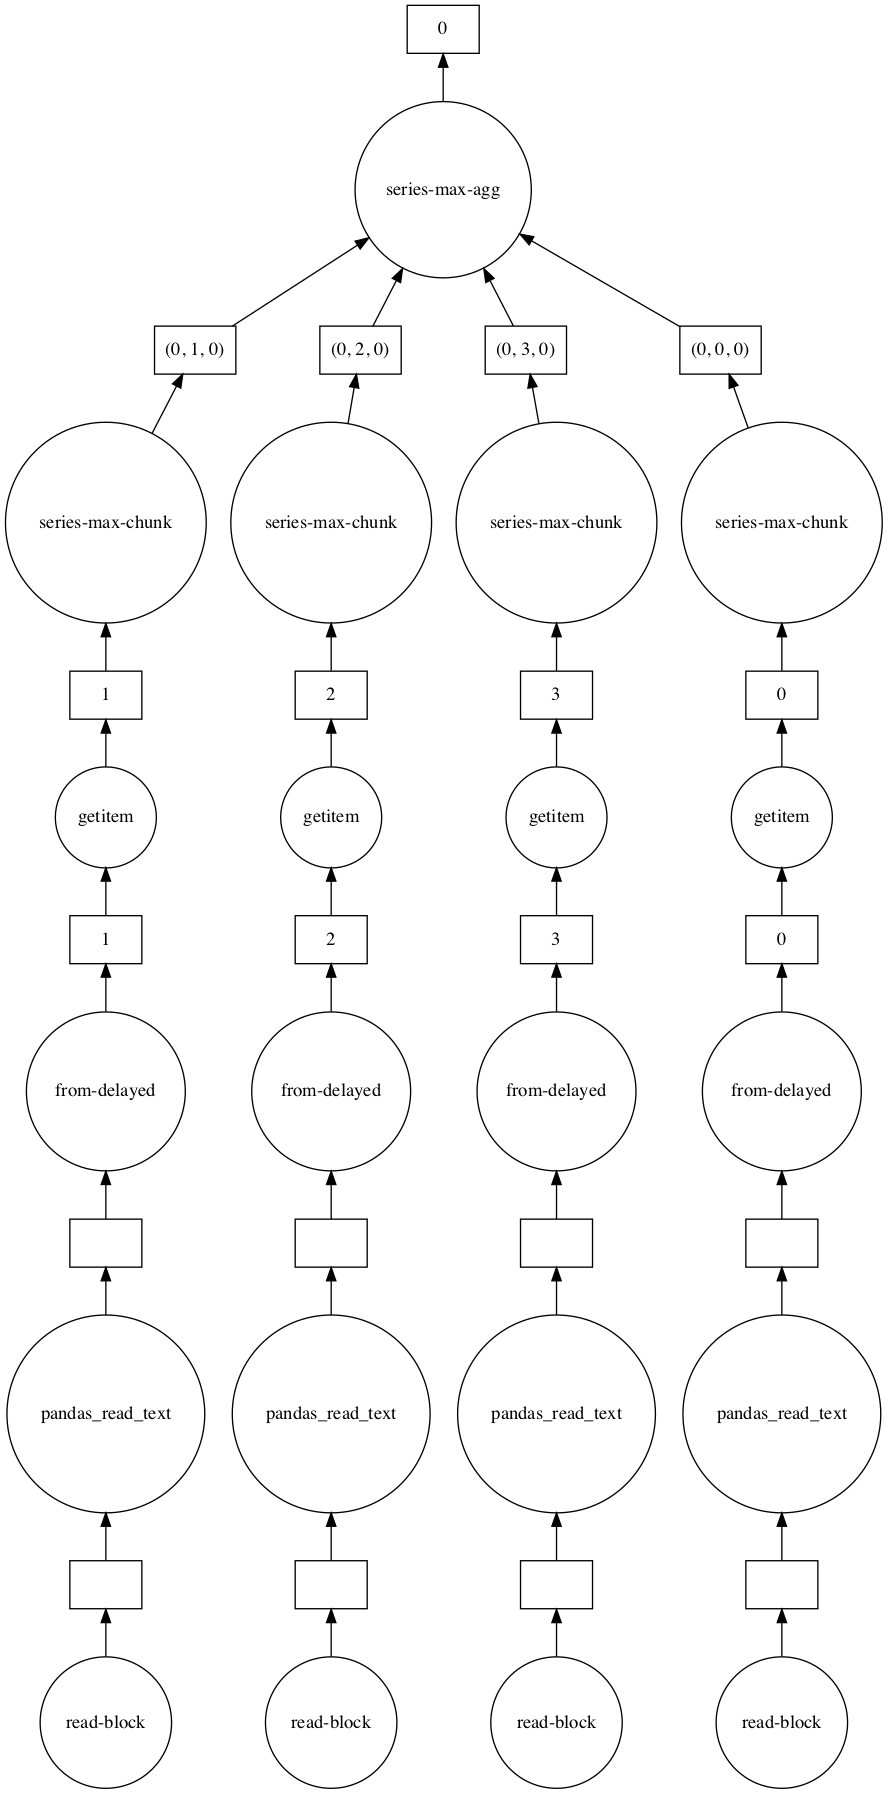

In [205]:
ddf['YEAR'].max().visualize()
# .compute()

In [207]:
ddf.columns

Index(['YEAR', 'MONTH', 'UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID',
       'DEST_AIRPORT_ID', 'DEP_DELAY', 'DEP_DELAY_NEW', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'CANCELLED', 'Unnamed: 10'],
      dtype='object')

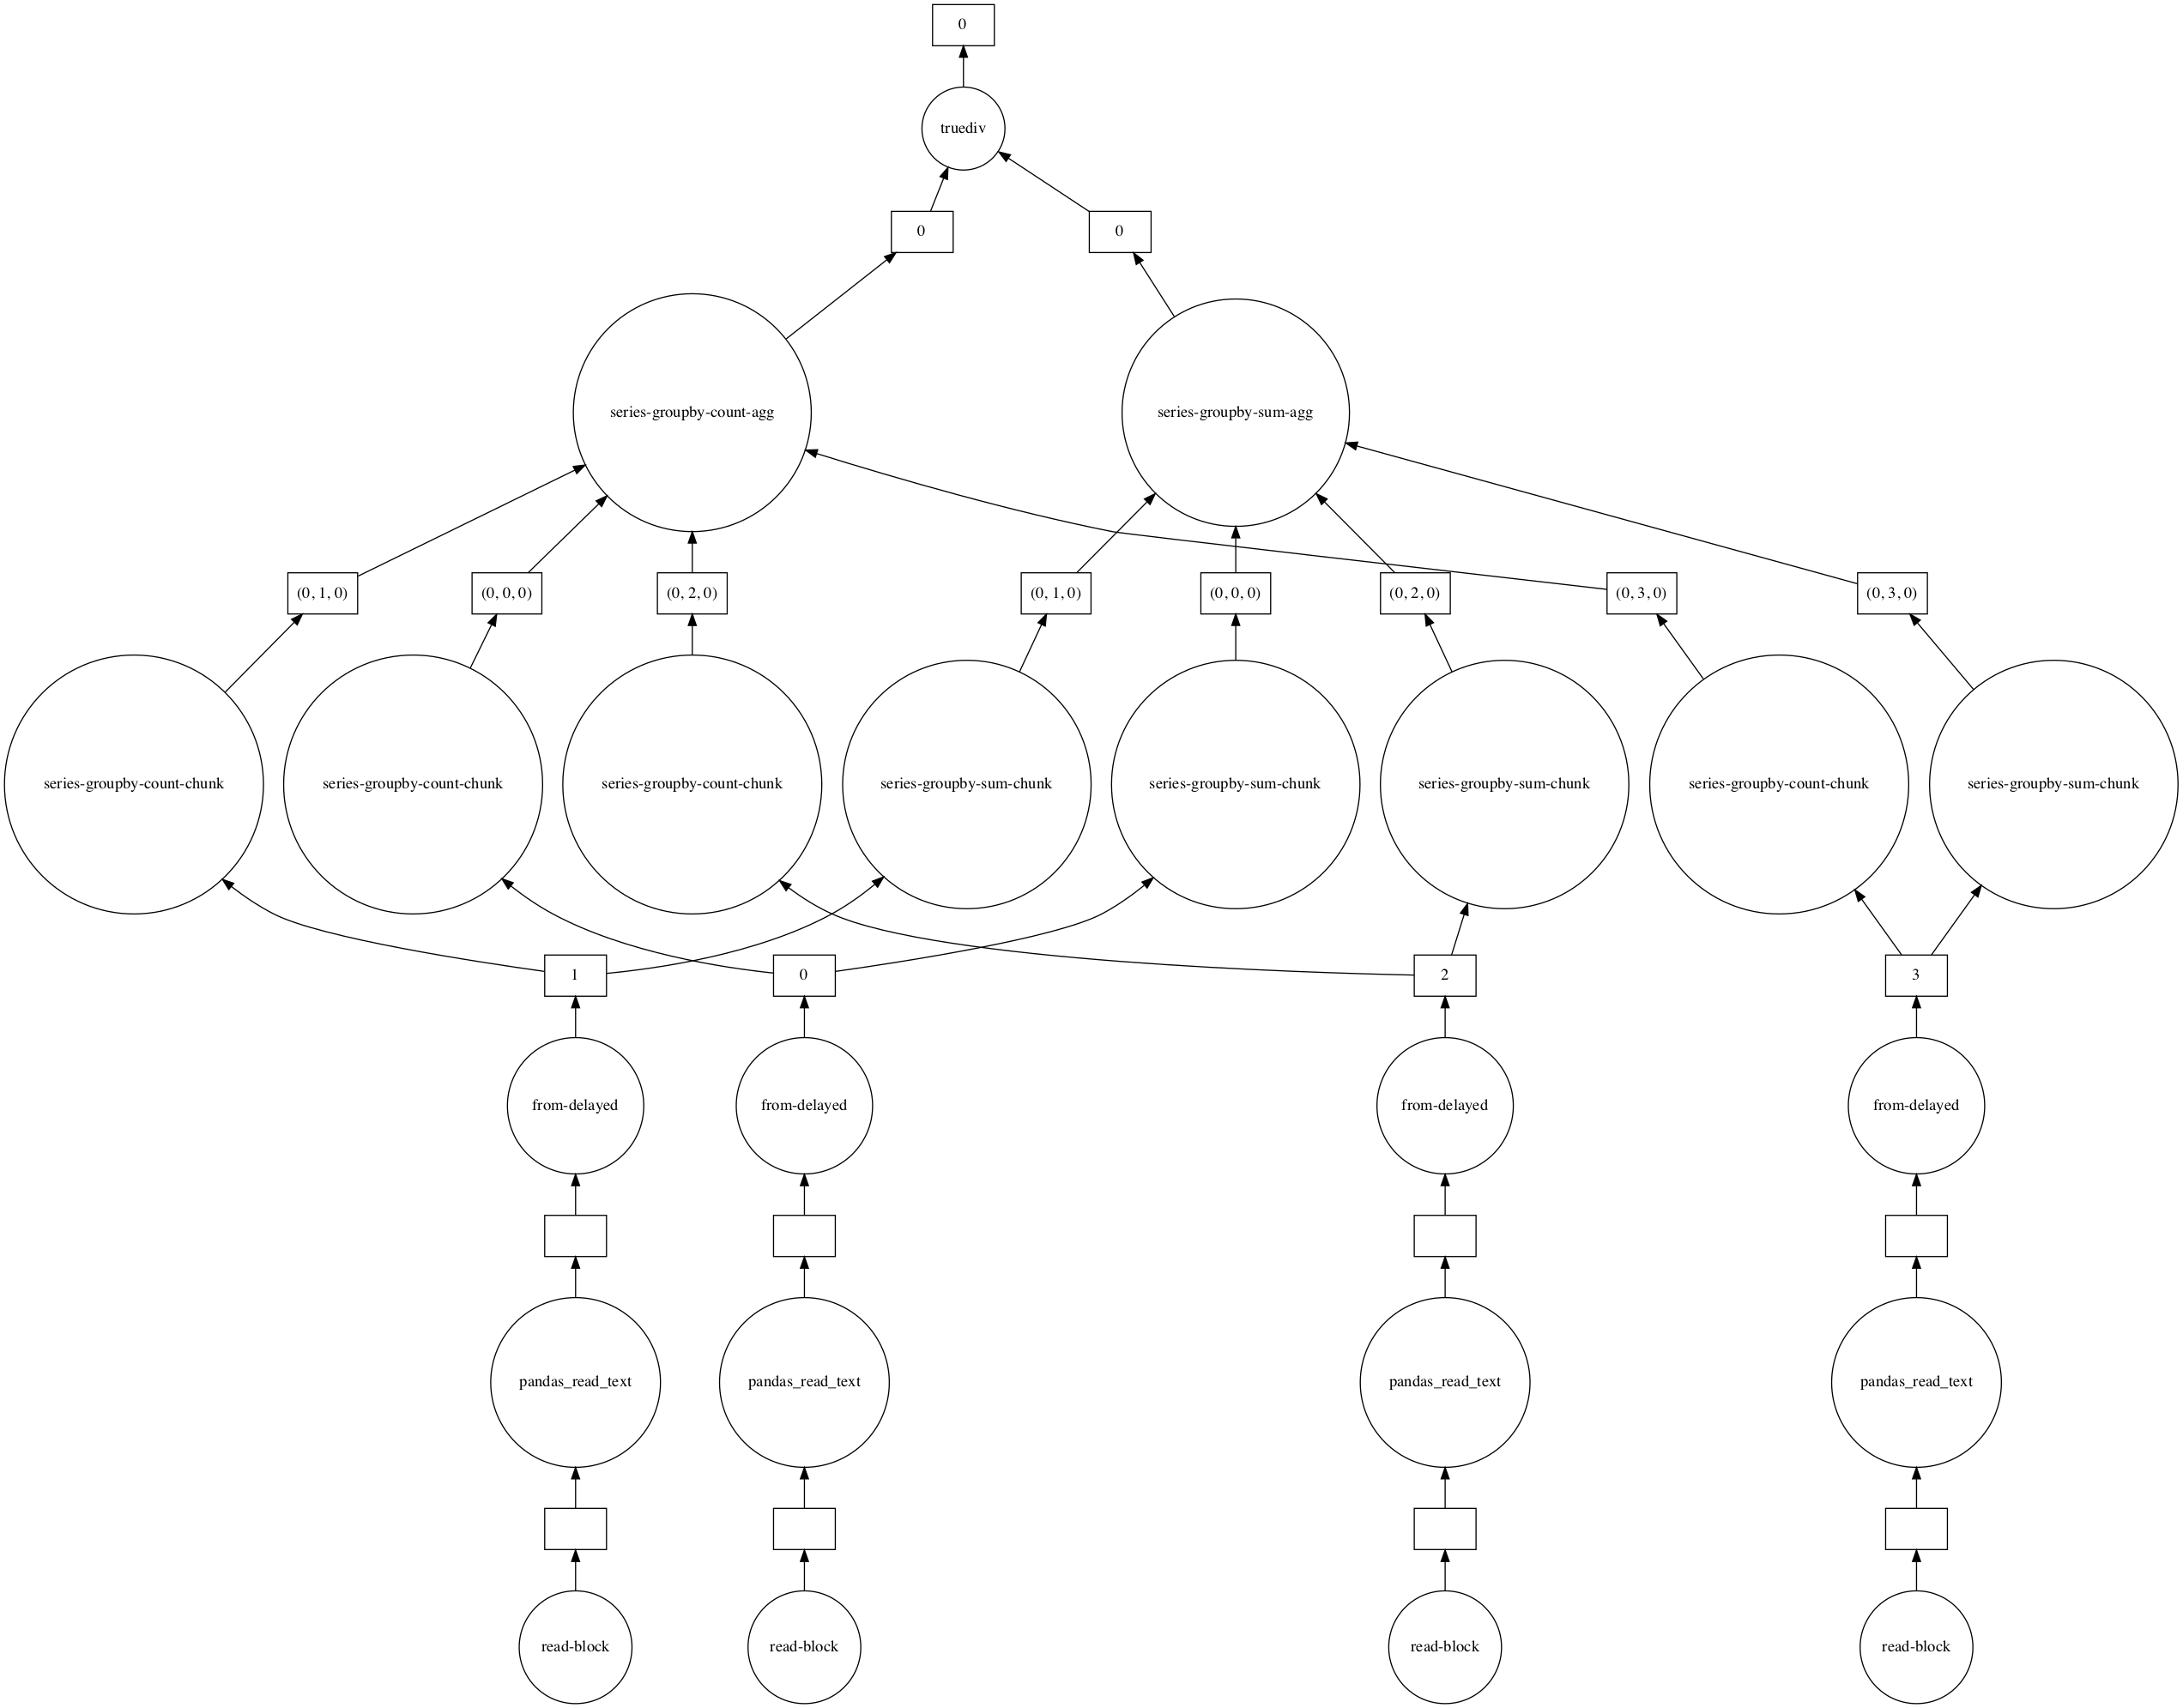

In [222]:
avg = ddf.groupby('ORIGIN_AIRPORT_ID')['DEP_DELAY'].mean()
avg.visualize()

In [223]:
avg.compute()

ORIGIN_AIRPORT_ID
12478   -5.966667
12892    3.717949
Name: DEP_DELAY, dtype: float64

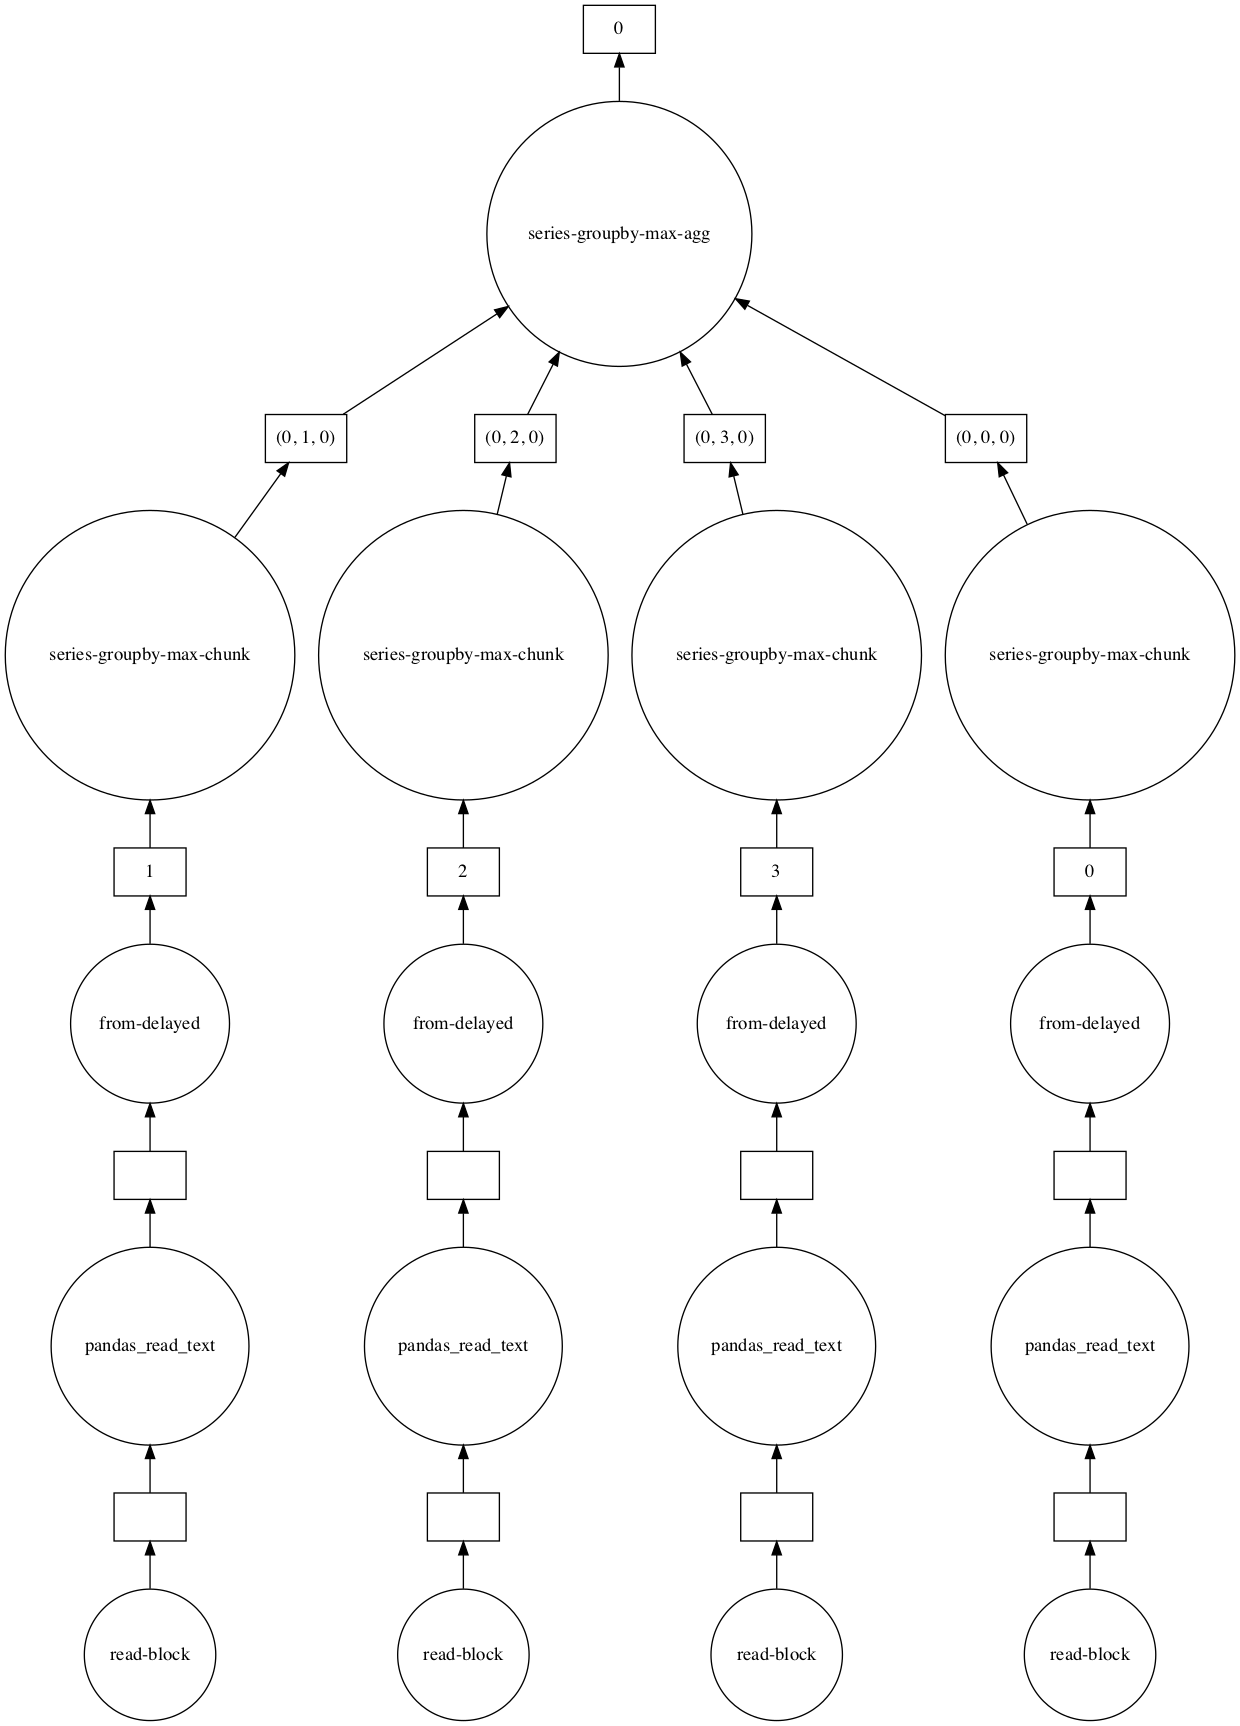

In [225]:
max_ = ddf.groupby('ORIGIN_AIRPORT_ID')['DEP_DELAY'].max()
max_.visualize()


In [226]:
max_.compute()

ORIGIN_AIRPORT_ID
12478     7.0
12892    85.0
Name: DEP_DELAY, dtype: float64

In [228]:
client.shutdown()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
